# Install modules and Import libraries

In [7]:
#pip install deep-translator

In [8]:
#pip install fasttext

In [ ]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [ ]:
#pip install streamlit-echarts

In [104]:
import nltk
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import  numpy as np
from PIL import Image
import requests
import json
import re
import string

from pprint import pprint
from tkinter import *
from translate import Translator
from deep_translator import GoogleTranslator
from googletrans import Translator
import fasttext
import warnings
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

warnings.filterwarnings("ignore")

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/maxime/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maxime/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import data

In [15]:
data = pd.read_csv('reviewsAvene.csv')
data.shape

(490, 3)

In [16]:
data.head()

,title,stars,comment
0,\n\n\n\n\n\n\n\n \n \n Excelente\n \n,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Excelente\...
1,\n\n\n\n\n\n\n\n \n \n Works well for ros...,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I have ros...
2,\n\n\n\n\n\n\n\n \n \n Refreshing\n \n,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I absolute...
3,\n\n\n\n\n\n\n\n \n \n Perfect for sensit...,5.0 out of 5 stars,"\n\n\n\n\n\n\n\n\n\n \n \n \n Love it, w..."
4,\n\n\n\n\n\n\n\n \n \n Excelente\n \n,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Excelente\...


# Cleaning Part 1

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    490 non-null    object
 1   stars    490 non-null    object
 2   comment  490 non-null    object
dtypes: object(3)
memory usage: 11.6+ KB


In [17]:
# check null values
data.isna().sum()

title      0
stars      0
comment    0
dtype: int64

In [32]:
# check duplicates
data[data.duplicated(keep='first')]

,title,stars,comment
4,\n\n\n\n\n\n\n\n \n \n Excelente\n \n,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Excelente\...
172,\n\n\n\n\n\n\n\n \n \n Good\n \n,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Good\n\n \n
194,\n\n\n\n\n\n\n\n \n \n Love it\n \n,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Excellent ...
393,\n\n\n\n\n\n\n\n \n \n Five Stars\n \n,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n good\n\n \n
453,\n\n\n\n\n\n\n\n \n \n Five Stars\n \n,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n i like it....
489,\n\n\n\n\n\n\n\n \n \n Five Stars\n \n,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Good\n\n \n


In [35]:
# drop duplicates
data.drop_duplicates(inplace=True)
data.shape

(484, 3)

### remove backlines and special characters

In [36]:
# remove newline
data['title'] = data['title'].replace("n",'')
data['stars'] = data['stars'].replace(re.compile(r'\\n'),'')

In [37]:
# Clean columns and take only the score in stars
for i in range(len(data)):
    data['title'].iloc[i] = data['title'].iloc[i].replace('\n',"").replace('-'," ").strip()
    data['comment'].iloc[i] = data['comment'].iloc[i].replace('\n',"").replace('-'," ").strip()
    a = data['stars'].iloc[i]
    data['stars'].iloc[i] = int(a[0])
data.head()

,title,stars,comment
0,Excelente,5,Excelente
1,Works well for rosacea skin,5,I have rosacea and ocular rosacea….mainly the ...
2,Refreshing,5,I absolutely love this product. It is so refre...
3,Perfect for sensitive skin,5,"Love it, was recommended by a beautician a lon..."
5,Defective Spray Tip,1,This procdutive will not spray. I have tried r...


### remove emojis

In [38]:
# remove emojis
def remove_emojis(data):
    emoj = re.compile("["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        #"\U000024C2-\U0001F251" #chinese characters
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u2640-\u2642" 
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"  # dingbats
        "\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

for i in range(len(data)):
    data['title'].iloc[i] = remove_emojis(data['title'].iloc[i])
    data['comment'].iloc[i] = remove_emojis(data['comment'].iloc[i])

### Filtering English Title/Comments

In [39]:
#user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36'

In [59]:
import fasttext

fasttext.FastText.eprint = lambda x: None

In [60]:
# fasttext - library
model = fasttext.load_model('lid.176.ftz')
s = []
s2 = []

for i in range(len(data)):
    a = model.predict(data['title'].iloc[i], k=1)
    s.append(a[-2][-1][-2:])
    b = model.predict(data['comment'].iloc[i], k=1)
    s2.append(b[-2][-1][-2:])

In [69]:
data_en = pd.DataFrame()
title = []
comment = []
stars = []

for i in range(len(s)):
    if s[i]=="en" and s2[i]=='en' :
        title.append(data['title'].iloc[i])
        comment.append(data['comment'].iloc[i])
        stars.append(data['stars'].iloc[i])

data_en['stars'] = stars
data_en['title'] = title
data_en['comment'] = comment

In [66]:
data_en.shape

(441, 3)

# EDA Features, Part 1

In [70]:
# Regroup title + comment
#df = pd.DataFrame()
data_en['text'] = data_en['title']+' '+data_en['comment']
data_en.drop(columns=['title','comment'], inplace=True)
data_en

,stars,text
0,5,Works well for rosacea skin I have rosacea and...
1,5,Refreshing I absolutely love this product. It ...
2,5,"Perfect for sensitive skin Love it, was recomm..."
3,1,Defective Spray Tip This procdutive will not s...
4,5,Nice! Very soothing and cool
...,...,...
436,5,Five Stars A summertime must!
437,5,Super! I use this to seal my moisturizer Super...
438,5,Five Stars LOVE THIS STUFF!
439,5,It is really really good. It makes my dry face...


### Number of stopwords

In [71]:
stop = set(stopwords.words('english'))
data_en['stopwords'] = data_en['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data_en[['text','stopwords']].head()

,text,stopwords
0,Works well for rosacea skin I have rosacea and...,28
1,Refreshing I absolutely love this product. It ...,13
2,"Perfect for sensitive skin Love it, was recomm...",9
3,Defective Spray Tip This procdutive will not s...,47
4,Nice! Very soothing and cool,1


### Number of Punctuation

In [73]:
def count_punct(text):
    string.punctuation
    count = sum([1 for char in text if char in string.punctuation])
    return count

#Apply the defined function on the text data
data_en['punctuation'] = data_en['text'].apply(lambda x: count_punct(x))
data_en.head()

,stars,text,stopwords,punctuation
0,5,Works well for rosacea skin I have rosacea and...,28,10
1,5,Refreshing I absolutely love this product. It ...,13,5
2,5,"Perfect for sensitive skin Love it, was recomm...",9,4
3,1,Defective Spray Tip This procdutive will not s...,47,16
4,5,Nice! Very soothing and cool,1,1


### Number of numerical characters

In [74]:
data_en['numerics'] = data_en['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data_en.head()

,stars,text,stopwords,punctuation,numerics
0,5,Works well for rosacea skin I have rosacea and...,28,10,0
1,5,Refreshing I absolutely love this product. It ...,13,5,0
2,5,"Perfect for sensitive skin Love it, was recomm...",9,4,0
3,1,Defective Spray Tip This procdutive will not s...,47,16,0
4,5,Nice! Very soothing and cool,1,1,0


### Number of Uppercase Words

In [75]:
data_en['upper'] = data_en['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data_en.head()

,stars,text,stopwords,punctuation,numerics,upper
0,5,Works well for rosacea skin I have rosacea and...,28,10,0,3
1,5,Refreshing I absolutely love this product. It ...,13,5,0,1
2,5,"Perfect for sensitive skin Love it, was recomm...",9,4,0,0
3,1,Defective Spray Tip This procdutive will not s...,47,16,0,5
4,5,Nice! Very soothing and cool,1,1,0,0


# Cleaning Part 2

### All Text to lowercase

In [83]:
data_en['text'] = data_en['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### Removing Numerical Characters

In [81]:
data_en['text'] = data_en['text'].apply(lambda x:''.join([i for i in x if not i.isdigit()]))

### Removing Punctuation

In [84]:
data_en['text'] = data_en['text'].str.replace('[^\w\s]','')
data_en.head(10)

,stars,text,stopwords,punctuation,numerics,upper
0,5,works well for rosacea skin i have rosacea and...,28,10,0,3
1,5,refreshing i absolutely love this product it i...,13,5,0,1
2,5,perfect for sensitive skin love it was recomme...,9,4,0,0
3,1,defective spray tip this procdutive will not s...,47,16,0,5
4,5,nice very soothing and cool,1,1,0,0
5,5,comfortable extra fine mist and good for sensi...,2,1,0,0
6,5,best for your face ive been using this spray a...,15,0,0,1
7,2,sprayer clogs i would have given this stars be...,20,3,1,2
8,5,the best you can buy if you have sensitivity t...,16,1,0,0
9,4,somehow other waters work better for me avene ...,20,4,0,2


# Data preparation

### Removing Stopwords

In [87]:
data_en['text'] = data_en['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [90]:
#most frequents words
freq = pd.Series(' '.join(data_en['text']).split()).value_counts()[:50]
freq

skin           283
love           146
face           144
water          143
spray          135
good           108
great           84
sensitive       78
like            67
bottle          66
refreshing      63
stars           59
really          51
mist            50
five            49
one             47
used            47
dry             46
using           44
feel            44
feels           42
day             40
nice            36
avene           35
cool            32
amazing         32
time            31
buy             29
know            29
works           29
much            28
best            27
keep            27
well            26
would           25
got             25
thermal         24
perfect         24
moisturizer     24
even            22
stuff           22
working         21
soft            21
must            21
ive             21
long            20
eczema          20
routine         20
helps           19
facial          19
dtype: int64

### Add stopwords

In [89]:
# Adding common words from our document to stop_words
add_words = ["also","dont","upon","ll","ml","in","products","product","use","im"]
stop_words = set(stopwords.words("english"))
stop_added = stop_words.union(add_words)

data_en['text'] = data_en['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_added))

### Spell Correction

In [91]:
data_en['text'] = data_en['text'].apply(lambda x: str(TextBlob(x).correct()))

### Lemmatization

In [92]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

In [94]:
# Init the Wordnet Lemmatizer
values_list=[]

for i in range(len(data_en)):
    sentence = data_en['text'].iloc[i]
    values = []
    phrase = ''

    for w in nltk.word_tokenize(sentence):
        value = lemmatizer.lemmatize(w, get_wordnet_pos(w))
        phrase = phrase+" "+value
    values_list.append(phrase)

data_en['text'] = values_list

In [95]:
data_en['text']

0       work well rosacea skin rosacea ocular rosacea...
1       refresh absolutely love refresh leaf skin fee...
2       perfect sensitive skin love recommend beautic...
3       defective spray tip productive spray try remo...
4                                       nice soothe cool
                             ...                        
436                            five star summertime must
437     super seal moisturizer super seal moisturizer...
438                                 five star love stuff
439     really really good make dry face nice moist r...
440                     five star best skin really fresh
Name: text, Length: 441, dtype: object

In [142]:
# Export prepared data
data_en.to_csv('data_final.csv')

# EDA Features, Part 2

### Number of words

In [97]:
data_en['word_count'] = data_en['text'].apply(lambda x: len(str(x).split(" ")))
data_en.head()

,stars,text,stopwords,punctuation,numerics,upper,word_count
0,5,work well rosacea skin rosacea ocular rosacea...,28,10,0,3,36
1,5,refresh absolutely love refresh leaf skin fee...,13,5,0,1,24
2,5,perfect sensitive skin love recommend beautic...,9,4,0,0,15
3,1,defective spray tip productive spray try remo...,47,16,0,5,53
4,5,nice soothe cool,1,1,0,0,4


### Number of Characters

In [98]:
data_en['char_count'] = data_en['text'].str.len() ## this also includes spaces
data_en.head()

,stars,text,stopwords,punctuation,numerics,upper,word_count,char_count
0,5,work well rosacea skin rosacea ocular rosacea...,28,10,0,3,36,208
1,5,refresh absolutely love refresh leaf skin fee...,13,5,0,1,24,145
2,5,perfect sensitive skin love recommend beautic...,9,4,0,0,15,91
3,1,defective spray tip productive spray try remo...,47,16,0,5,53,348
4,5,nice soothe cool,1,1,0,0,4,17


### Average Word Length

In [99]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+0.000001))

data_en['avg_word'] = data_en['text'].apply(lambda x: avg_word(x)).round(1)
data_en.head()

,stars,text,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word
0,5,work well rosacea skin rosacea ocular rosacea...,28,10,0,3,36,208,4.9
1,5,refresh absolutely love refresh leaf skin fee...,13,5,0,1,24,145,5.3
2,5,perfect sensitive skin love recommend beautic...,9,4,0,0,15,91,5.5
3,1,defective spray tip productive spray try remo...,47,16,0,5,53,348,5.7
4,5,nice soothe cool,1,1,0,0,4,17,4.7


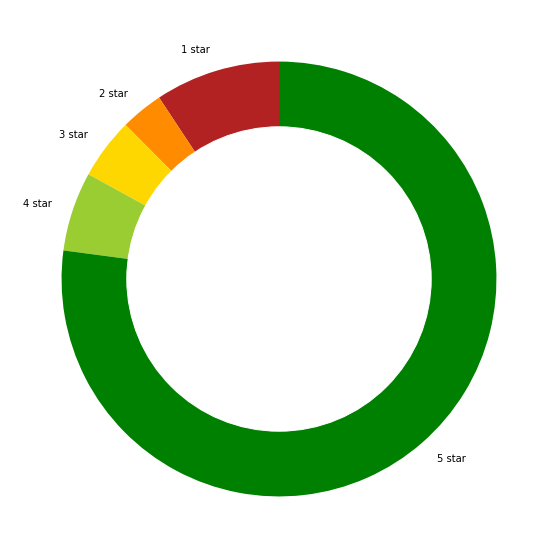

In [147]:
### Ratings
count_stars = data_en.groupby(data_en.stars, as_index = False).count()

count_stars = data_en.groupby(data_en.stars, as_index = False).count()

names = ['1 star','2 star','3 star','4 star','5 star']
plt.pie(count_stars.text, labels=names, colors=['firebrick','darkorange','gold','yellowgreen','green'], startangle=90)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')

p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Text(0.5, 1.0, 'average words')

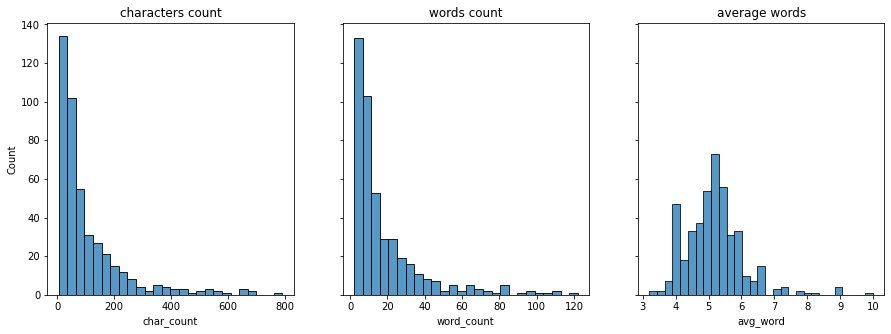

In [144]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
#fig.suptitle('words')

#nb characters
sns.histplot(ax=axes[0], data=data_en, x=data_en.char_count)
axes[0].set_title('characters count')

# word count
sns.histplot(ax=axes[1], data=data_en, x=data_en.word_count)
axes[1].set_title('words count')

# avg word
sns.histplot(ax=axes[2], data=data_en, x=data_en.avg_word) 
axes[2].set_title('average words')

# Sentiment Analysis

## Polarity

In [128]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblobfrom textblob import TextBlob
data_en['text']= data_en['text'].astype(str) #Make sure about the correct data type
pol = lambda x: TextBlob(x).sentiment.polarity
data_en['polarity'] = data_en['text'].apply(pol) # depending on the size of your data, this step may take some time.

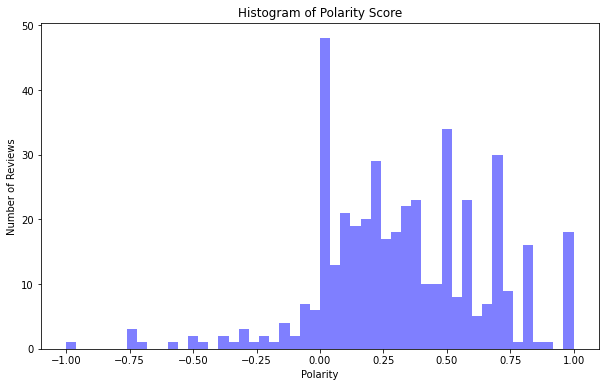

In [129]:
### polarity distribution
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(data_en.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show()

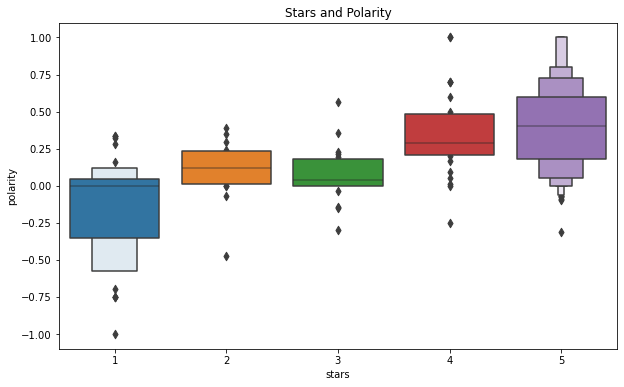

In [131]:
### Stars and Polarity
plt.figure(figsize=(10,6))
sns.boxenplot(x='stars', y='polarity', data=data_en)
plt.title('Stars and Polarity')
plt.show()

In [117]:
# check reviews having dissonance between star rating and polarity score
data_en[(data_en.polarity<0 & (data_en.stars==5))]
'''
the polarity score is most of the time more accurate than the stars rating for these reviews
we will then use polarity to filter googd and bad reviews in our following analysis
'''

,stars,text,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
3,1,defective spray tip productive spray try remo...,47,16,0,5,53,348,5.7,-1.043771e-02,0.370640
10,1,bad ever bad like water waste money item refu...,9,4,0,1,13,69,4.7,-3.500000e-01,0.433333
21,5,refresh add skin care mountain give see impro...,8,1,0,0,11,64,5.4,-6.666667e-02,0.600000
27,1,know know give terrible acne know may come fa...,46,27,0,10,58,357,5.3,-1.339286e-01,0.730952
40,5,oooolala make water france know mean five star,5,2,0,1,9,47,4.9,-3.125000e-01,0.687500
48,1,receive go cut dirty item allow return receiv...,20,7,0,0,30,184,5.3,-1.397727e-01,0.504924
57,1,disappointed seem like second hand th,1,0,0,0,7,38,5.3,-3.750000e-01,0.375000
60,1,cause bad breakup allergic reaction use time ...,50,11,0,6,57,356,5.4,-2.289881e-01,0.625476
67,5,refresh refresh face relieve itchiness cause ...,26,9,0,2,23,143,5.5,-3.571429e-02,0.440476
69,3,doesn work well get prime day reason give sta...,13,8,1,1,20,104,4.5,-3.333333e-02,0.183333


In [139]:
### Most negative reviews
bad_reviews = data_en[(data_en.polarity < -0.7)]
for i in range(len(bad_reviews)):
    print(bad_reviews['text'].iloc[i])

 damage damage soon disappointed wait week
 pay two get one description say two pack receive one disappointed
 order item order item away create order buying others terrible return
 june piece cap disappointed since can return go give one star use one day spray valve stop work result can not june piece cap disappointed


In [141]:
### Most positive reviews
positive_reviews = data_en[(data_en.polarity==1)&(data_en.subjectivity<0.5)]
for i in range(len(positive_reviews)):
    print(positive_reviews['text'].iloc[i])

 best face give use spray avenue year since discover france excite find amazon
 best laser procedure refresh irritate
 must think purchase thermal water try one best remove irritation redness
 best spring water best mineral water skin
 best price amaze
 best set spray set look refresh


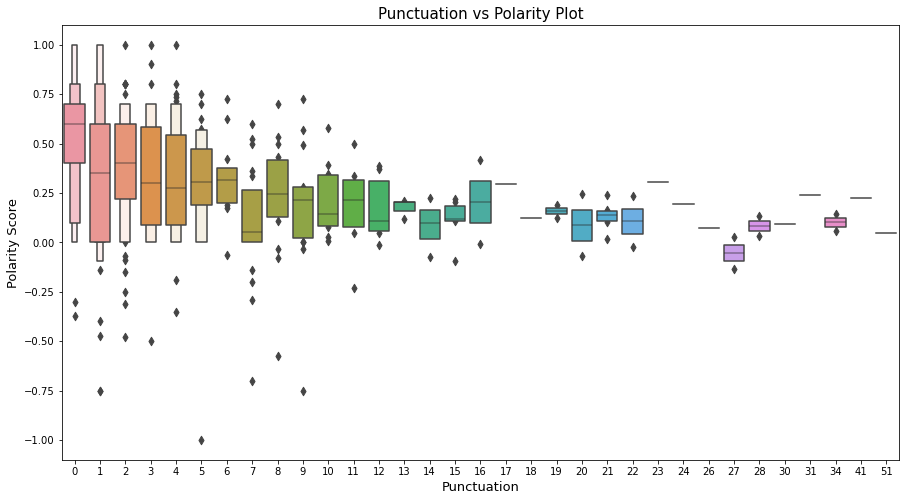

In [114]:
### Punctuation Vs Polarity
plt.figure(figsize=(15,8))
sns.boxenplot(x='punctuation', y='polarity', data=data_en)
plt.xlabel('Punctuation', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Punctuation vs Polarity Plot', fontsize=15)
plt.show()

## Subjectivity

In [116]:
sub = lambda x: TextBlob(x).sentiment.subjectivity
data_en['subjectivity'] = data_en['text'].apply(sub)
data_en.head()

,stars,text,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
0,5,work well rosacea skin rosacea ocular rosacea...,28,10,0,3,36,208,4.9,0.178571,0.642857
1,5,refresh absolutely love refresh leaf skin fee...,13,5,0,1,24,145,5.3,0.292857,0.480952
2,5,perfect sensitive skin love recommend beautic...,9,4,0,0,15,91,5.5,0.425000,0.633333
3,1,defective spray tip productive spray try remo...,47,16,0,5,53,348,5.7,-0.010438,0.370640
4,5,nice soothe cool,1,1,0,0,4,17,4.7,0.475000,0.825000


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

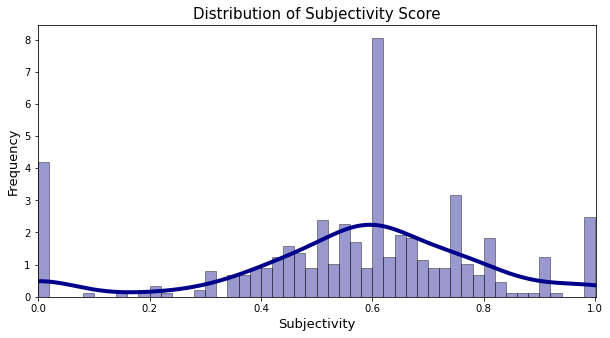

In [120]:
### Subjectivity distribution
plt.figure(figsize=(10,5))
sns.distplot(data_en['subjectivity'], hist=True, kde=True,
bins=int(50), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

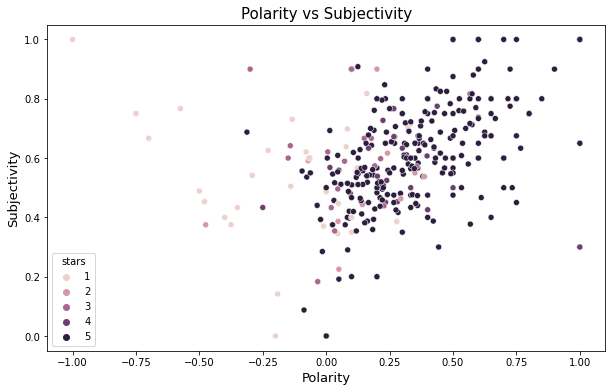

In [122]:
### Polarity vs Subjectivity
plt.figure(figsize=(10,6))
sns.scatterplot(x='polarity', y='subjectivity', hue="stars", data=data_en)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show()

In [125]:
sentiment_means = pd.DataFrame()
for i in range (1,6):
    sentiment_means.loc[i,'polarity'] = data_en[data_en.stars==i].polarity.mean()
    sentiment_means.loc[i,'subjectivity'] = data_en[data_en.stars==i].subjectivity.mean()
sentiment_means

,polarity,subjectivity
1,-0.145573,0.441946
2,0.101871,0.466288
3,0.076887,0.502506
4,0.352830,0.548487
5,0.404469,0.589060


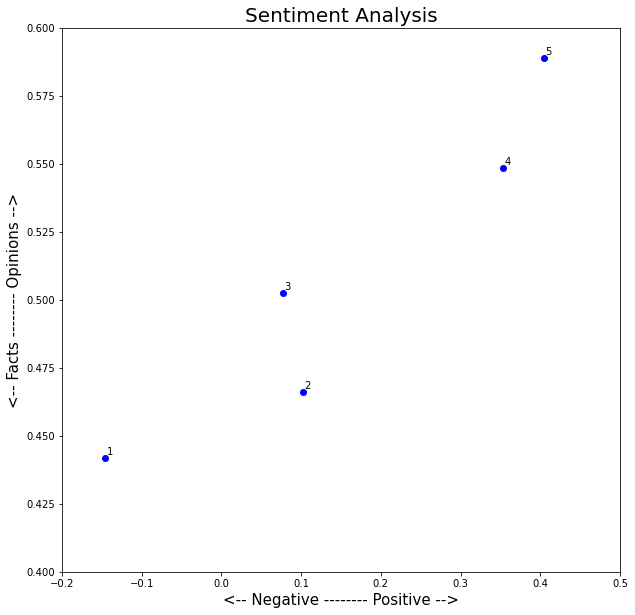

In [126]:
plt.rcParams['figure.figsize'] = [10, 10]

for index in range(1,6):
    x = sentiment_means.polarity.loc[index]
    y = sentiment_means.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.002, y+.001, index, fontsize=10)
    plt.xlim(-0.2, 0.5) 
    plt.ylim(0.40, .6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Words analysis

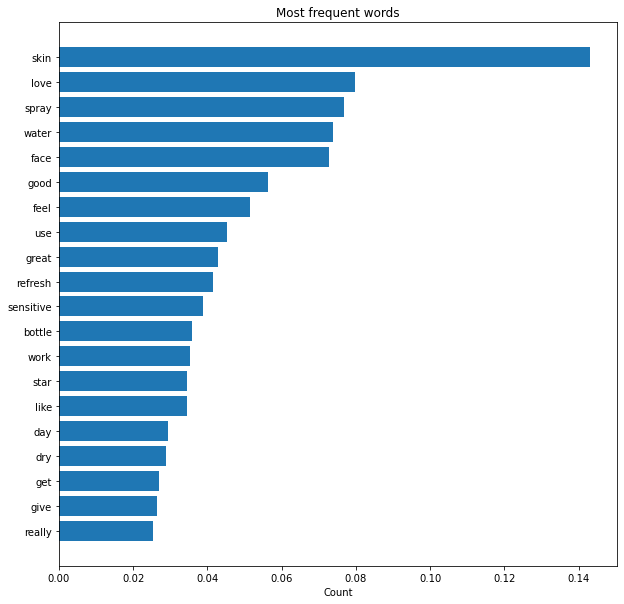

In [149]:
## Most frequent words
from nltk import FreqDist

def freq_words(x):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    d = words_df.nlargest(columns="count", n=20)
    d = d.sort_values(by='count', ascending=True)
    d['freq_rel'] = d['count']/(sum(d['count']))
    plt.barh(d.word,d['freq_rel'])
    plt.title('Most frequent words')
    plt.xlabel('Count')
    plt.show()


freq_words(data_en.text)

### Good reviews

In [162]:
# functions to isolate nouns and adjectives
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import string
from nltk import word_tokenize, pos_tag

def regroup_text(dataSerie):
    text = '' 
    for val in dataSerie: 
        val = str(val) 
        tokens = val.split() 
        text += " ".join(tokens)+" "
    return text

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

def adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_adj = lambda pos: pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    adj = [word for (word, pos) in pos_tag(tokenized) if is_adj(pos)] 
    return ' '.join(adj)

def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

def freq_words_in_text(text):
    all_words = text.split()
   
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    d = words_df.nlargest(columns="count", n=20)
    d = d.sort_values(by='count', ascending=True)
    d['freq_rel'] = d['count']/(sum(d['count']))
    
    plt.barh(d.word,d['freq_rel'])
    plt.title('Most frequent words')
    plt.xlabel('Percentage')
    plt.show()

[nltk_data] Downloading package punkt to /Users/maxime/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/maxime/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


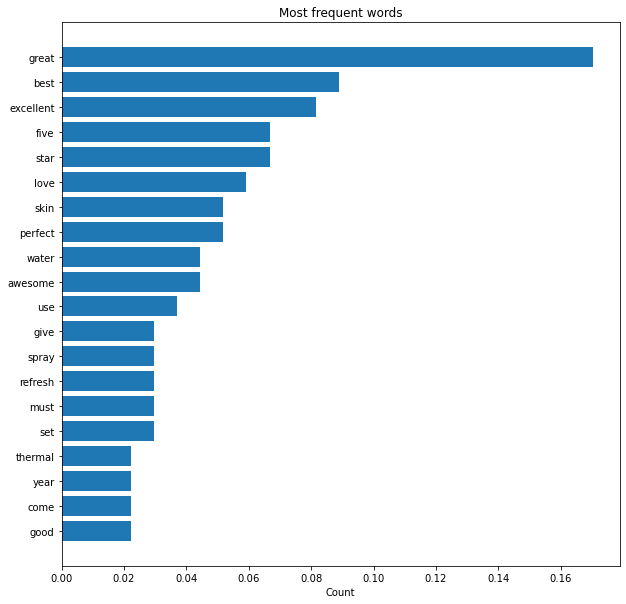

In [158]:
## Good reviews most frequent words
good_reviews = data_en[(data_en.polarity > 0.7)]
freq_words(good_reviews.text)

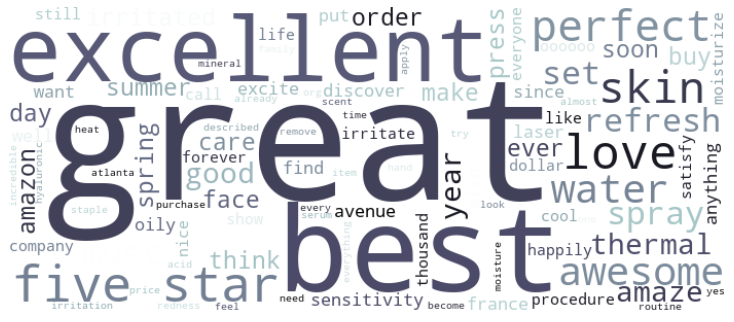

In [159]:
# create corpus good reviews

corpus_good_reviews =[]
# split each words comment in a list
corpus_good_reviews = good_reviews.text.str.split()

# add all splitted words in a list
corpus_good_reviews = corpus_good_reviews.values.tolist()
corpus_good_reviews = [word for i in corpus_good_reviews for word in i]

# unify corpus in one element
words_good = '' 
words_good += " ".join(corpus_good_reviews)+" "

# add stopwords
stopwords=set(['use','product','come','can'])


#pic = np.array(Image.open(requests.get('http://cliparts/8/4/s/A/p/8/thumb-up-md.png',stream=True).raw))

# wordcloud : see the most frequent words (visualization)
wordcloud = WordCloud(width = 700, height = 300, background_color ='white', stopwords=stopwords, 
             min_font_size=10, colormap='bone').generate(words_good)

# plot
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

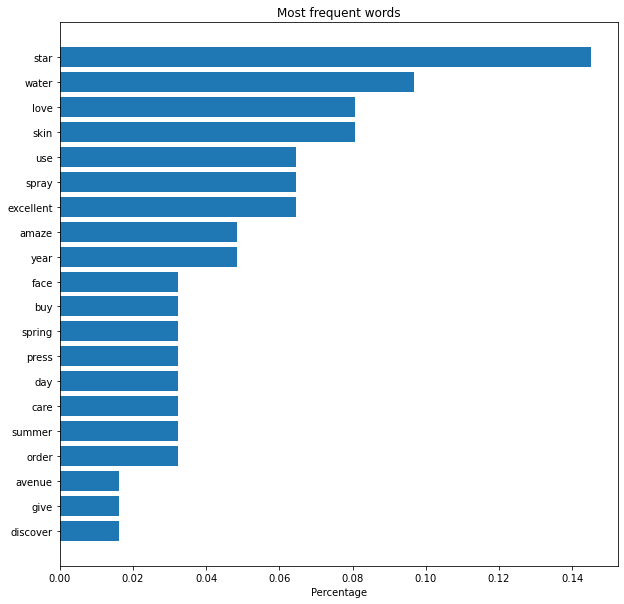

In [163]:
# Top Nouns for GOOD reviews
nouns_gr = nouns(regroup_text(good_reviews.text))
freq_words_in_text(nouns_gr)

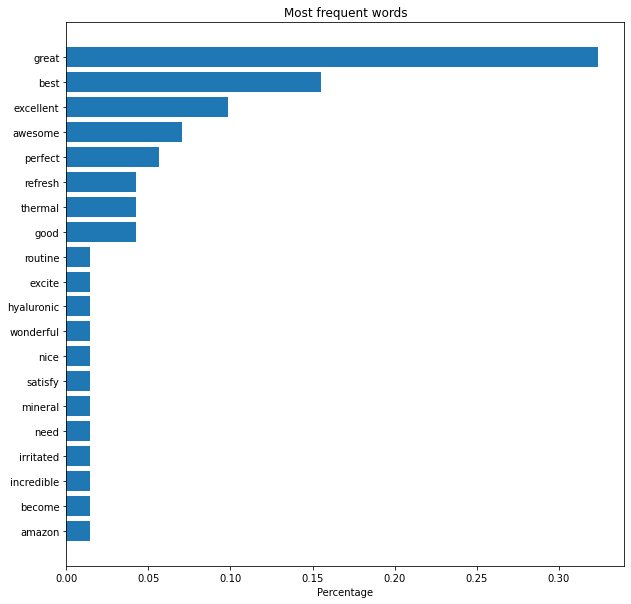

In [165]:
# Top ADJECTIVES for GOOD reviews
adj_gr = adj(regroup_text(good_reviews.text))
freq_words_in_text(adj_gr)

### Bad reviews

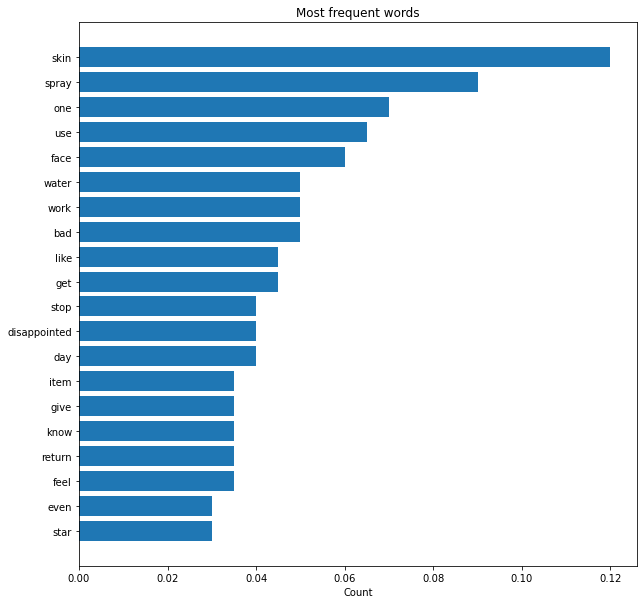

In [153]:
## Bad reviews most frequent words
bad_reviews = data_en[data_en.polarity < 0]
freq_words(bad_reviews.text)

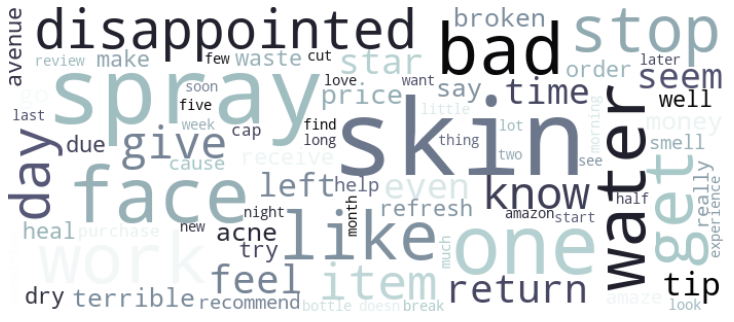

In [160]:
# create corpus bad reviews


# split each words comment in a list
corpus_bad_reviews =[]
corpus_bad_reviews = bad_reviews.text.str.split()

# add all splitted words in a list
corpus_bad_reviews = corpus_bad_reviews.values.tolist()
corpus_bad_reviews = [word for i in corpus_bad_reviews for word in i]
# unify in one element
words_bad = '' 
words_bad += " ".join(corpus_bad_reviews)+" "
# add stopwords
stopwords=set(['use','product','come','can'])
#pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/5/5/d/6/1194989754480445982tiger_graig_ryan_smith_-_01.svg.med.png',stream=True).raw))
# wordcloud : see the most frequent words (visualization)
wordcloud = WordCloud(width=700, height=300, background_color='white', stopwords=stopwords, 
                min_font_size=10, colormap='bone').generate(words_bad)
# plot
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

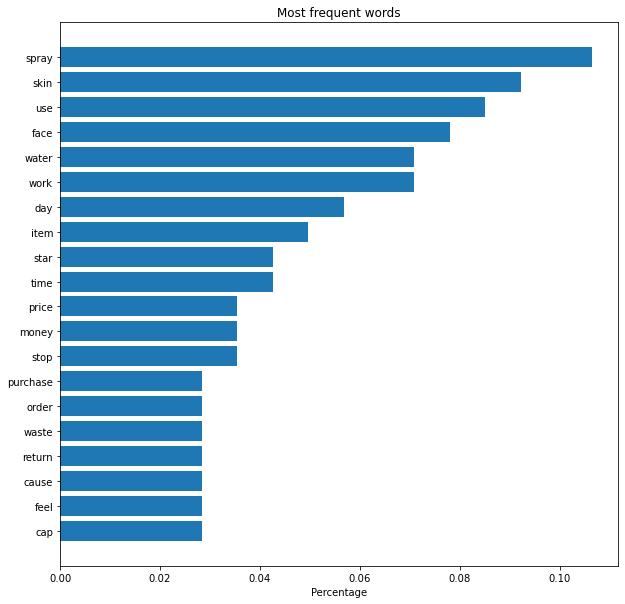

In [164]:
# Top NOUNS for BAD reviews
noun_gr = nouns(regroup_text(bad_reviews.text))
freq_words_in_text(noun_gr)

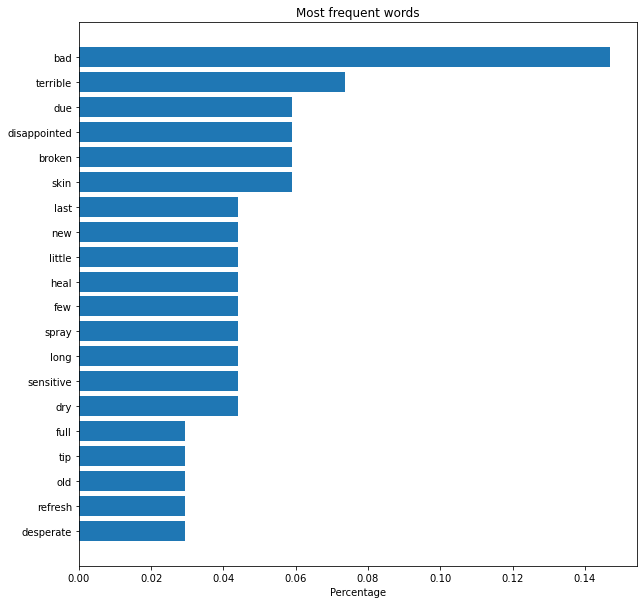

In [166]:
# Top ADJECTIVES for BAD reviews
adj_gr = adj(regroup_text(bad_reviews.text))
freq_words_in_text(adj_gr)